In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
import wordcloud

In [ ]:
tweets_df = pd.read_csv('../data/results/data_sentiment.csv', index=False)

In [70]:
tweets_df

,0,1,2,3
0,2020-10-18 15:10:14,1317845450695888896,RT @PlataformaEMT: Esta es la situación actual de @BiciMAD Cientos de bicicletas averiadas esper...,Dmayoraru
1,2020-10-18 15:07:38,1317844798070525953,RT @busero20: Señor @AlmeidaPP_ déjense de atentar contra los valores democráticos que simboliza...,Quique Villalobos
2,2020-10-18 15:03:55,1317843860500996102,RT @SostienePereir8: @PlataformaEMT @BiciMAD el Aytº @MADRID está retirando bicis y reduciendo p...,Abre los ojos
3,2020-10-18 15:03:24,1317843730058125313,"RT @AlejoRofer: Aquí estamos, esperando. @BiciMAD #AlmeidaBoicoteaBiciMAD https://t.co/u32E3RmZ7p",Abre los ojos
4,2020-10-18 15:02:25,1317843482917089282,RT @PlataformaEMT: Esta es la situación actual de @BiciMAD Cientos de bicicletas averiadas esper...,SinPrensaNoHayDemo
...,...,...,...,...
995,2020-10-17 15:32:43,1317488720761716745,RT @PlataformaEMT: Esta es la situación actual de @BiciMAD Cientos de bicicletas averiadas esper...,Vecinaopera
996,2020-10-17 15:32:43,1317488720413601794,RT @PlataformaEMT: Esta es la situación actual de @BiciMAD Cientos de bicicletas averiadas esper...,Palominadas
997,2020-10-17 15:32:11,1317488585323520005,RT @PlataformaEMT: Esta es la situación actual de @BiciMAD Cientos de bicicletas averiadas esper...,malon10552
998,2020-10-17 15:31:48,1317488490200915968,RT @PlataformaEMT: Esta es la situación actual de @BiciMAD Cientos de bicicletas averiadas esper...,Vecepresedenta 🔻 📿


Timestamp('2020-10-17 15:31:24')

In [17]:
def load_data():
    data = pd.read_csv('../data/processed/data.csv')
    return data

In [18]:
tweet_df = load_data()
tweet_df.head()

,date,id,text,user_name
0,2020-09-29 06:34:23,1310830261450539009,RT @carnecrudaradio: Quiero felicitar al alcalde @AlmeidaPP_ por su exitosa labor destruyendo @B...,alex vega
1,2020-09-29 07:01:33,1310837099189473280,"Señores de @BiciMAD @MADRID las bicis están muy descuidadas (lo saben). A menor uso de bicis, má...",Neuroneater
2,2020-09-29 07:43:50,1310847740386201600,"@JMDLatina Espero de este distrito no solo que proteja el mejor legado ambiental de Madrid, sino...",Andrés Pina
3,2020-09-29 07:53:20,1310850131344920576,RT @_AguilarM: @PlataformaEMT @BiciMAD @bcarabante @AlmeidaPP_ @EMTmadrid O la fecha de la últim...,ElMaNDaLoRiaNo
4,2020-09-29 08:05:56,1310853301810888704,La misma vergüenza de TODOS los días. Una estación de @BiciMAD totalmente abandonada por @MADRID...,Diego Azul


In [19]:
tweet_df['ADR_label'] = np.random.randint(0, 2, tweet_df.shape[0])

In [20]:
tweet_df

,date,id,text,user_name,ADR_label
0,2020-09-29 06:34:23,1310830261450539009,RT @carnecrudaradio: Quiero felicitar al alcalde @AlmeidaPP_ por su exitosa labor destruyendo @B...,alex vega,0
1,2020-09-29 07:01:33,1310837099189473280,"Señores de @BiciMAD @MADRID las bicis están muy descuidadas (lo saben). A menor uso de bicis, má...",Neuroneater,0
2,2020-09-29 07:43:50,1310847740386201600,"@JMDLatina Espero de este distrito no solo que proteja el mejor legado ambiental de Madrid, sino...",Andrés Pina,0
3,2020-09-29 07:53:20,1310850131344920576,RT @_AguilarM: @PlataformaEMT @BiciMAD @bcarabante @AlmeidaPP_ @EMTmadrid O la fecha de la últim...,ElMaNDaLoRiaNo,1
4,2020-09-29 08:05:56,1310853301810888704,La misma vergüenza de TODOS los días. Una estación de @BiciMAD totalmente abandonada por @MADRID...,Diego Azul,0
...,...,...,...,...,...
4489,2020-10-17 06:49:45,1317357111261728768,"RT @Batperro82: Hoy, gracias a mi odisea por las estaciones de @BiciMAD del entorno de Chueca - ...",AP-Madrid Nosevende,1
4490,2020-10-17 06:53:35,1317358078686265345,La pésima gestión de Bicimad nos obligan a volver a la lucha. Por un servicio público y de calid...,BICIMAD EN LUCHA,0
4491,2020-10-17 07:01:21,1317360030895738880,RT @Bacoher: @bcarabante @EMTmadrid Será sinvergüenza @bcarabante tiene usted la @EMTmadrid como...,Julio,1
4492,2020-10-17 07:01:52,1317360160378159104,RT @PlataformaEMT: @bcarabante @EMTmadrid @BiciMAD Si no lo hace se encontrará muy pronto con l@...,Julio,1


** X.X. Pre-processing text data **  <br>
Most of the text data are cleaned by following below steps.

- Remove punctuations
- Tokenization - Converting a sentence into list of words
- Remove stopwords
- Lammetization/stemming - Tranforming any form of a word to its root word

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['text'].apply(lambda x: remove_punct(x))
df.head(10)

,id,text,Tweet_punct
0,1310830261450539009,RT @carnecrudaradio: Quiero felicitar al alcalde @AlmeidaPP_ por su exitosa labor destruyendo @B...,RT carnecrudaradio Quiero felicitar al alcalde AlmeidaPP por su exitosa labor destruyendo BiciMA...
1,1310837099189473280,"Señores de @BiciMAD @MADRID las bicis están muy descuidadas (lo saben). A menor uso de bicis, má...",Señores de BiciMAD MADRID las bicis están muy descuidadas lo saben A menor uso de bicis más de m...
2,1310847740386201600,"@JMDLatina Espero de este distrito no solo que proteja el mejor legado ambiental de Madrid, sino...",JMDLatina Espero de este distrito no solo que proteja el mejor legado ambiental de Madrid sino q...
3,1310850131344920576,RT @_AguilarM: @PlataformaEMT @BiciMAD @bcarabante @AlmeidaPP_ @EMTmadrid O la fecha de la últim...,RT AguilarM PlataformaEMT BiciMAD bcarabante AlmeidaPP EMTmadrid O la fecha de la última OPE par...
4,1310853301810888704,La misma vergüenza de TODOS los días. Una estación de @BiciMAD totalmente abandonada por @MADRID...,La misma vergüenza de TODOS los días Una estación de BiciMAD totalmente abandonada por MADRID Al...
5,1310855286345928706,RT @carnecrudaradio: Quiero felicitar al alcalde @AlmeidaPP_ por su exitosa labor destruyendo @B...,RT carnecrudaradio Quiero felicitar al alcalde AlmeidaPP por su exitosa labor destruyendo BiciMA...
6,1310855298777837568,RT @carnecrudaradio: Quiero felicitar al alcalde @AlmeidaPP_ por su exitosa labor destruyendo @B...,RT carnecrudaradio Quiero felicitar al alcalde AlmeidaPP por su exitosa labor destruyendo BiciMA...
7,1310864629661343744,RT @diego_rebollo: La misma vergüenza de TODOS los días. Una estación de @BiciMAD totalmente aba...,RT diegorebollo La misma vergüenza de TODOS los días Una estación de BiciMAD totalmente abandona...
8,1310869173782958080,"@PDiazAlejo @Roberto_R_R @josemanuel_co @ManuelaCarmena Sí, tampoco es que durante cuatro años c...",PDiazAlejo RobertoRR josemanuelco ManuelaCarmena Sí tampoco es que durante cuatro años crearan u...
9,1310870126628134912,"@BiciMAD Hola, no he podido desanclar ninguna bici, el mensaje de la app es que no tengo la cuen...",BiciMAD Hola no he podido desanclar ninguna bici el mensaje de la app es que no tengo la cuenta ...


In [26]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

,id,text,Tweet_punct,Tweet_tokenized
0,1310830261450539009,RT @carnecrudaradio: Quiero felicitar al alcalde @AlmeidaPP_ por su exitosa labor destruyendo @B...,RT carnecrudaradio Quiero felicitar al alcalde AlmeidaPP por su exitosa labor destruyendo BiciMA...,"[rt, carnecrudaradio, quiero, felicitar, al, alcalde, almeidapp, por, su, exitosa, labor, destru..."
1,1310837099189473280,"Señores de @BiciMAD @MADRID las bicis están muy descuidadas (lo saben). A menor uso de bicis, má...",Señores de BiciMAD MADRID las bicis están muy descuidadas lo saben A menor uso de bicis más de m...,"[señores, de, bicimad, madrid, las, bicis, están, muy, descuidadas, lo, saben, a, menor, uso, de..."
2,1310847740386201600,"@JMDLatina Espero de este distrito no solo que proteja el mejor legado ambiental de Madrid, sino...",JMDLatina Espero de este distrito no solo que proteja el mejor legado ambiental de Madrid sino q...,"[jmdlatina, espero, de, este, distrito, no, solo, que, proteja, el, mejor, legado, ambiental, de..."
3,1310850131344920576,RT @_AguilarM: @PlataformaEMT @BiciMAD @bcarabante @AlmeidaPP_ @EMTmadrid O la fecha de la últim...,RT AguilarM PlataformaEMT BiciMAD bcarabante AlmeidaPP EMTmadrid O la fecha de la última OPE par...,"[rt, aguilarm, plataformaemt, bicimad, bcarabante, almeidapp, emtmadrid, o, la, fecha, de, la, ú..."
4,1310853301810888704,La misma vergüenza de TODOS los días. Una estación de @BiciMAD totalmente abandonada por @MADRID...,La misma vergüenza de TODOS los días Una estación de BiciMAD totalmente abandonada por MADRID Al...,"[la, misma, vergüenza, de, todos, los, días, una, estación, de, bicimad, totalmente, abandonada,..."


In [32]:
import nltk

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Blanca/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
from nltk.corpus import stopwords

In [35]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [36]:
stopword = nltk.corpus.stopwords.words('spanish')

In [37]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,id,text,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,1310830261450539009,RT @carnecrudaradio: Quiero felicitar al alcalde @AlmeidaPP_ por su exitosa labor destruyendo @B...,RT carnecrudaradio Quiero felicitar al alcalde AlmeidaPP por su exitosa labor destruyendo BiciMA...,"[rt, carnecrudaradio, quiero, felicitar, al, alcalde, almeidapp, por, su, exitosa, labor, destru...","[rt, carnecrudaradio, quiero, felicitar, alcalde, almeidapp, exitosa, labor, destruyendo, bicima..."
1,1310837099189473280,"Señores de @BiciMAD @MADRID las bicis están muy descuidadas (lo saben). A menor uso de bicis, má...",Señores de BiciMAD MADRID las bicis están muy descuidadas lo saben A menor uso de bicis más de m...,"[señores, de, bicimad, madrid, las, bicis, están, muy, descuidadas, lo, saben, a, menor, uso, de...","[señores, bicimad, madrid, bicis, descuidadas, saben, menor, uso, bicis, metro, bus, httpstcokqd..."
2,1310847740386201600,"@JMDLatina Espero de este distrito no solo que proteja el mejor legado ambiental de Madrid, sino...",JMDLatina Espero de este distrito no solo que proteja el mejor legado ambiental de Madrid sino q...,"[jmdlatina, espero, de, este, distrito, no, solo, que, proteja, el, mejor, legado, ambiental, de...","[jmdlatina, espero, distrito, solo, proteja, mejor, legado, ambiental, madrid, sino, incorpore, ..."
3,1310850131344920576,RT @_AguilarM: @PlataformaEMT @BiciMAD @bcarabante @AlmeidaPP_ @EMTmadrid O la fecha de la últim...,RT AguilarM PlataformaEMT BiciMAD bcarabante AlmeidaPP EMTmadrid O la fecha de la última OPE par...,"[rt, aguilarm, plataformaemt, bicimad, bcarabante, almeidapp, emtmadrid, o, la, fecha, de, la, ú...","[rt, aguilarm, plataformaemt, bicimad, bcarabante, almeidapp, emtmadrid, fecha, última, ope, avi..."
4,1310853301810888704,La misma vergüenza de TODOS los días. Una estación de @BiciMAD totalmente abandonada por @MADRID...,La misma vergüenza de TODOS los días Una estación de BiciMAD totalmente abandonada por MADRID Al...,"[la, misma, vergüenza, de, todos, los, días, una, estación, de, bicimad, totalmente, abandonada,...","[misma, vergüenza, días, estación, bicimad, totalmente, abandonada, madrid, almeidapp, igua, htt..."
5,1310855286345928706,RT @carnecrudaradio: Quiero felicitar al alcalde @AlmeidaPP_ por su exitosa labor destruyendo @B...,RT carnecrudaradio Quiero felicitar al alcalde AlmeidaPP por su exitosa labor destruyendo BiciMA...,"[rt, carnecrudaradio, quiero, felicitar, al, alcalde, almeidapp, por, su, exitosa, labor, destru...","[rt, carnecrudaradio, quiero, felicitar, alcalde, almeidapp, exitosa, labor, destruyendo, bicima..."
6,1310855298777837568,RT @carnecrudaradio: Quiero felicitar al alcalde @AlmeidaPP_ por su exitosa labor destruyendo @B...,RT carnecrudaradio Quiero felicitar al alcalde AlmeidaPP por su exitosa labor destruyendo BiciMA...,"[rt, carnecrudaradio, quiero, felicitar, al, alcalde, almeidapp, por, su, exitosa, labor, destru...","[rt, carnecrudaradio, quiero, felicitar, alcalde, almeidapp, exitosa, labor, destruyendo, bicima..."
7,1310864629661343744,RT @diego_rebollo: La misma vergüenza de TODOS los días. Una estación de @BiciMAD totalmente aba...,RT diegorebollo La misma vergüenza de TODOS los días Una estación de BiciMAD totalmente abandona...,"[rt, diegorebollo, la, misma, vergüenza, de, todos, los, días, una, estación, de, bicimad, total...","[rt, diegorebollo, misma, vergüenza, días, estación, bicimad, totalmente, abandonada, madrid, al..."
8,1310869173782958080,"@PDiazAlejo @Roberto_R_R @josemanuel_co @ManuelaCarmena Sí, tampoco es que durante cuatro años c...",PDiazAlejo RobertoRR josemanuelco ManuelaCarmena Sí tampoco es que durante cuatro años crearan u...,"[pdiazalejo, robertorr, josemanuelco, manuelacarmena, sí, tampoco, es, que, durante, cuatro, año...","[pdiazalejo, robertorr, josemanuelco, manuelacarmena, tampoco, cuatro, años, crearan, infraest, ..."
9,1310870126628134912,"@BiciMAD Hola, no he podido desanclar ninguna bici, el mensaje de la app es que no ten

In [38]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,id,text,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,1310830261450539009,RT @carnecrudaradio: Quiero felicitar al alcalde @AlmeidaPP_ por su exitosa labor destruyendo @B...,RT carnecrudaradio Quiero felicitar al alcalde AlmeidaPP por su exitosa labor destruyendo BiciMA...,"[rt, carnecrudaradio, quiero, felicitar, al, alcalde, almeidapp, por, su, exitosa, labor, destru...","[rt, carnecrudaradio, quiero, felicitar, alcalde, almeidapp, exitosa, labor, destruyendo, bicima...","[rt, carnecrudaradio, quiero, felicitar, alcald, almeidapp, exitosa, labor, destruyendo, bicimad..."
1,1310837099189473280,"Señores de @BiciMAD @MADRID las bicis están muy descuidadas (lo saben). A menor uso de bicis, má...",Señores de BiciMAD MADRID las bicis están muy descuidadas lo saben A menor uso de bicis más de m...,"[señores, de, bicimad, madrid, las, bicis, están, muy, descuidadas, lo, saben, a, menor, uso, de...","[señores, bicimad, madrid, bicis, descuidadas, saben, menor, uso, bicis, metro, bus, httpstcokqd...","[señor, bicimad, madrid, bici, descuidada, saben, menor, uso, bici, metro, bu, httpstcokqddneij]"
2,1310847740386201600,"@JMDLatina Espero de este distrito no solo que proteja el mejor legado ambiental de Madrid, sino...",JMDLatina Espero de este distrito no solo que proteja el mejor legado ambiental de Madrid sino q...,"[jmdlatina, espero, de, este, distrito, no, solo, que, proteja, el, mejor, legado, ambiental, de...","[jmdlatina, espero, distrito, solo, proteja, mejor, legado, ambiental, madrid, sino, incorpore, ...","[jmdlatina, espero, distrito, solo, proteja, mejor, legado, ambient, madrid, sino, incorpor, htt..."
3,1310850131344920576,RT @_AguilarM: @PlataformaEMT @BiciMAD @bcarabante @AlmeidaPP_ @EMTmadrid O la fecha de la últim...,RT AguilarM PlataformaEMT BiciMAD bcarabante AlmeidaPP EMTmadrid O la fecha de la última OPE par...,"[rt, aguilarm, plataformaemt, bicimad, bcarabante, almeidapp, emtmadrid, o, la, fecha, de, la, ú...","[rt, aguilarm, plataformaemt, bicimad, bcarabante, almeidapp, emtmadrid, fecha, última, ope, avi...","[rt, aguilarm, plataformaemt, bicimad, bcarabant, almeidapp, emtmadrid, fecha, última, ope, avit..."
4,1310853301810888704,La misma vergüenza de TODOS los días. Una estación de @BiciMAD totalmente abandonada por @MADRID...,La misma vergüenza de TODOS los días Una estación de BiciMAD totalmente abandonada por MADRID Al...,"[la, misma, vergüenza, de, todos, los, días, una, estación, de, bicimad, totalmente, abandonada,...","[misma, vergüenza, días, estación, bicimad, totalmente, abandonada, madrid, almeidapp, igua, htt...","[misma, vergüenza, día, estación, bicimad, totalment, abandonada, madrid, almeidapp, igua, https..."


In [43]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/Blanca/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [45]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,id,text,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,1310830261450539009,RT @carnecrudaradio: Quiero felicitar al alcalde @AlmeidaPP_ por su exitosa labor destruyendo @B...,RT carnecrudaradio Quiero felicitar al alcalde AlmeidaPP por su exitosa labor destruyendo BiciMA...,"[rt, carnecrudaradio, quiero, felicitar, al, alcalde, almeidapp, por, su, exitosa, labor, destru...","[rt, carnecrudaradio, quiero, felicitar, alcalde, almeidapp, exitosa, labor, destruyendo, bicima...","[rt, carnecrudaradio, quiero, felicitar, alcald, almeidapp, exitosa, labor, destruyendo, bicimad...","[rt, carnecrudaradio, quiero, felicitar, alcalde, almeidapp, exitosa, labor, destruyendo, bicima..."
1,1310837099189473280,"Señores de @BiciMAD @MADRID las bicis están muy descuidadas (lo saben). A menor uso de bicis, má...",Señores de BiciMAD MADRID las bicis están muy descuidadas lo saben A menor uso de bicis más de m...,"[señores, de, bicimad, madrid, las, bicis, están, muy, descuidadas, lo, saben, a, menor, uso, de...","[señores, bicimad, madrid, bicis, descuidadas, saben, menor, uso, bicis, metro, bus, httpstcokqd...","[señor, bicimad, madrid, bici, descuidada, saben, menor, uso, bici, metro, bu, httpstcokqddneij]","[señores, bicimad, madrid, bicis, descuidadas, saben, menor, uso, bicis, metro, bus, httpstcokqd..."
2,1310847740386201600,"@JMDLatina Espero de este distrito no solo que proteja el mejor legado ambiental de Madrid, sino...",JMDLatina Espero de este distrito no solo que proteja el mejor legado ambiental de Madrid sino q...,"[jmdlatina, espero, de, este, distrito, no, solo, que, proteja, el, mejor, legado, ambiental, de...","[jmdlatina, espero, distrito, solo, proteja, mejor, legado, ambiental, madrid, sino, incorpore, ...","[jmdlatina, espero, distrito, solo, proteja, mejor, legado, ambient, madrid, sino, incorpor, htt...","[jmdlatina, espero, distrito, solo, proteja, mejor, legado, ambiental, madrid, sino, incorpore, ..."
3,1310850131344920576,RT @_AguilarM: @PlataformaEMT @BiciMAD @bcarabante @AlmeidaPP_ @EMTmadrid O la fecha de la últim...,RT AguilarM PlataformaEMT BiciMAD bcarabante AlmeidaPP EMTmadrid O la fecha de la última OPE par...,"[rt, aguilarm, plataformaemt, bicimad, bcarabante, almeidapp, emtmadrid, o, la, fecha, de, la, ú...","[rt, aguilarm, plataformaemt, bicimad, bcarabante, almeidapp, emtmadrid, fecha, última, ope, avi...","[rt, aguilarm, plataformaemt, bicimad, bcarabant, almeidapp, emtmadrid, fecha, última, ope, avit...","[rt, aguilarm, plataformaemt, bicimad, bcarabante, almeidapp, emtmadrid, fecha, última, ope, avi..."
4,1310853301810888704,La misma vergüenza de TODOS los días. Una estación de @BiciMAD totalmente abandonada por @MADRID...,La misma vergüenza de TODOS los días Una estación de BiciMAD totalmente abandonada por MADRID Al...,"[la, misma, vergüenza, de, todos, los, días, una, estación, de, bicimad, totalmente, abandonada,...","[misma, vergüenza, días, estación, bicimad, totalmente, abandonada, madrid, almeidapp, igua, htt...","[misma, vergüenza, día, estación, bicimad, totalment, abandonada, madrid, almeidapp, igua, https...","[misma, vergüenza, días, estación, bicimad, totalmente, abandonada, madrid, almeidapp, igua, htt..."


In [46]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [48]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['text'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))

4494 Number of tweets has 4221 words


In [49]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aavv,ab,abajo,abandona,abandonada,abandonado,abandonar,abandono,abarbolani,...,éste,ésto,éxito,ínfima,última,últimam,últimament,último,única,único
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df = pd.DataFrame(df[['id', 'Tweet_lemmatized']])

KeyError: "['Tweet_lemmatized'] not in index"

In [54]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_ADR = tweet_df[tweet_df['ADR_label']==1]
df_NADR = tweet_df[tweet_df['ADR_label']==0]
tweet_All = " ".join(review for review in df.Tweet)
tweet_ADR = " ".join(review for review in df_ADR.Tweet)
tweet_NADR = " ".join(review for review in df_NADR.Tweet)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_ADR)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NADR)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Tweets under ADR Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Tweets under None - ADR Class',fontsize=30)
ax[2].axis('off')

#wordcloud.to_file("img/first_review.png")

AttributeError: 'DataFrame' object has no attribute 'Tweet'

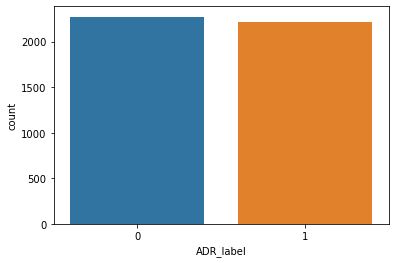

In [55]:
sns.countplot(x = 'ADR_label', data = tweet_df)

In [56]:
df = pd.DataFrame(tweet_df[['id', 'text']])

In [57]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_ADR = tweet_df[tweet_df['ADR_label']==1]
df_NADR = tweet_df[tweet_df['ADR_label']==0]
tweet_All = " ".join(review for review in df.Tweet)
tweet_ADR = " ".join(review for review in df_ADR.Tweet)
tweet_NADR = " ".join(review for review in df_NADR.Tweet)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_ADR)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NADR)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Tweets under ADR Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Tweets under None - ADR Class',fontsize=30)
ax[2].axis('off')

#wordcloud.to_file("img/first_review.png")

AttributeError: 'DataFrame' object has no attribute 'Tweet'